## <font color =blue>RNN

Recurrent Neural Networks, a.k.a. RNN is a famous supervised Deep Learning methodology. Other commonly used Deep Learning neural networks are Convolutional Neural Networks and Artificial Neural Networks. The main goal behind Deep Learning is to reiterate the functioning of a brain by a machine. As a result of which, loosely, each neural network structure epitomizes a part of the brain.
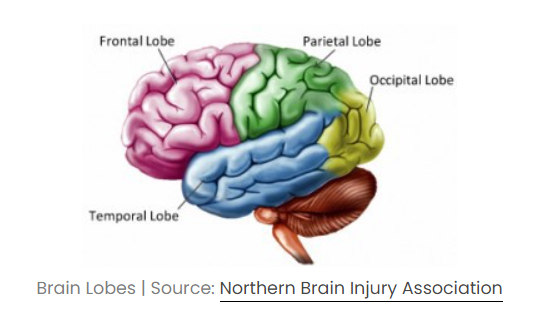

Artificial Neural Network, a.k.a. ANN stores data for a long time, so does the Temporal lobe. So it is linked with the Temporal Lobe. Convolutional Neural Networks, a.k.a. CNN, are used in image classification and Computer Vision tasks. The same work in our brain is done by Occipital Lobe and so CNN can be referenced with Occipital Lobe. Now, RNN is mainly used where we have to work with a sequence of data. In such work, the network learns from what it has just observed, i.e., Short-term memory. As a result of which, it resembles the Frontal Lobe of the brain.

### <font color =blue>RNN Application and Types

### <font color =blue>Import Libraries 

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__   # returns the version of tensorflow installed

'2.9.1'

### <font color =blue>Import Dataset from Tensorflow
    
In this tutorial, we will work on Text Classification using the IMDB movie review dataset. This dataset has 50k reviews of different movies. It is a benchmark dataset used in text-classification to train and test the Machine Learning and Deep Learning model. We will create a model to predict if the movie review is positive or negative. It is a binary classification problem. This dataset can be imported directly by using Tensorflow or can be downloaded from Kaggle.

In [3]:
dataset,info = tfds.load('imdb_reviews/subwords8k',with_info=True, as_supervised=True)

### <font color =blue>Creating Train and Test Dataset

In [4]:
train,test = dataset['train'],dataset['test']

### <font color =blue>Preprocessing

In [5]:
encoder = info.features['text'].encoder # encoder to create features

In [6]:
encoder.vocab_size  # Vocabolary of encoder

8185

In [7]:
# Simple example to see how string is encoded
s = 'Hello how are you'
es = encoder.encode(s)
es

[4025, 222, 113, 29, 151]

In [8]:
# Respective word and its vector
for id in es:
    print('{} >> {}'.format(id,encoder.decode([id])))

4025 >> Hell
222 >> o 
113 >> how 
29 >> are 
151 >> you


In [9]:
train = train.shuffle(1000)         # shuffles the dataset
train = train.padded_batch(50)      # Creates a batch of 50 and also padding is done here.
test = test.padded_batch(50)

### <font color =blue>Model Building

Recurrent Neural Networks work in three stages. In the first stage, it moves forward through the hidden layer and makes a prediction. In the second stage, it compares its prediction with the true value using the loss function. Loss function showcases how well a model is performing. The lower the value of the loss function, the better is the model. In the final stage, it uses the error values in back-propagation, which further calculates the gradient for each point (node). The gradient is the value used to adjust the weights of the network at each point.

Recurrent Neural Networks are commonly used when we are dealing with sequential data. The reason is, the model uses layers that give the model a short-term memory. Using this memory, it can predict the next data more accurately. The time for which the information about the past data will be kept is not fixed, but it depends on the weights allotted to it. Thus, RNN is used in Sentiment Analysis, Sequence Labeling, Speech tagging, etc.

In [10]:
model = tf.keras.Sequential([
                            tf.keras.layers.Embedding(encoder.vocab_size,10),
                            tf.keras.layers.LSTM(12),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1) ])

### <font color =blue>Model Compilation

In this text classification tutorial, we are predicting a positive review or a negative review. Thus we are working on a binary classification problem. So we use the loss function of “binary_crossentropy.” Also, the metrics used will be “accuracy.” 
While training the model, we train the model in batches. Instead of training a single review at a time, we divide it into batches. This reduces the computational power. We have used a batch size of 128 for the model.

In [11]:
model.compile(
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(1e-3),
              metrics = ['accuracy']
             )

### <font color =blue>Model Fitting

In [12]:
history = model.fit(train,epochs=2,validation_data=test,validation_steps=30)

Epoch 1/2
500/500 [==============================] - 123s 242ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 2/2
500/500 [==============================] - 117s 233ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4993


In [14]:
test_loss,test_acc = model.evaluate(test)

500/500 [==============================] - 25s 49ms/step - loss: 0.6931 - accuracy: 0.5000


Resource:
https://www.tensorflow.org/text/tutorials/text_classification_rnn